In [1]:
# Built In
from datetime import datetime

# Plot
import plotly.graph_objs as go

# Custom
from library.fetch_data import get_data

## Plot Functions

In [2]:
def countries_plot(df, df_types, countries=[]):
    all_stats = ['Confirmed', 'Recovered', 'Death']
    if df_types == 'All':
        df_types = all_stats
    else:
        df_types = [df_types]

    title = 'Covid Stats'
    if len(df_types) == 1:
        title = f'Covid {df_types[0]} Stats'
    if len(countries) < 5:
        title = f'{title} for {", ".join(countries)}'

    if countries == []:
        countries = df.index

    # Create a list of traces for each country
    traces = []
    for df_type in df_types:
        for country in countries:
            trace = go.Scatter(
                x=df.columns, y=df.loc[(df_type, country)], mode='lines', name=f'{df_type}, {country}')
            traces.append(trace)

    # Create the layout for the plot
    latest = max(df.columns).strftime('%d %b, %Y')
    layout = go.Layout(
        title=title+f' Until {latest}',
        xaxis=dict(title='Date'),
        yaxis=dict(title='No. of People')
    )

    # Create the figure and add the traces and layout
    fig = go.Figure(data=traces, layout=layout)

    # Show the plot
    return fig

## Fetch Data

In [3]:
# Fetch Data Locally
full_df = get_data(online=False)

Locally Data fetching


## Filter by dates

In [4]:
threshold = datetime(2021, 8, 1)
filter_col = [i for i in full_df.columns if threshold > i]
df = full_df.get(filter_col)

# df = full_df.copy()

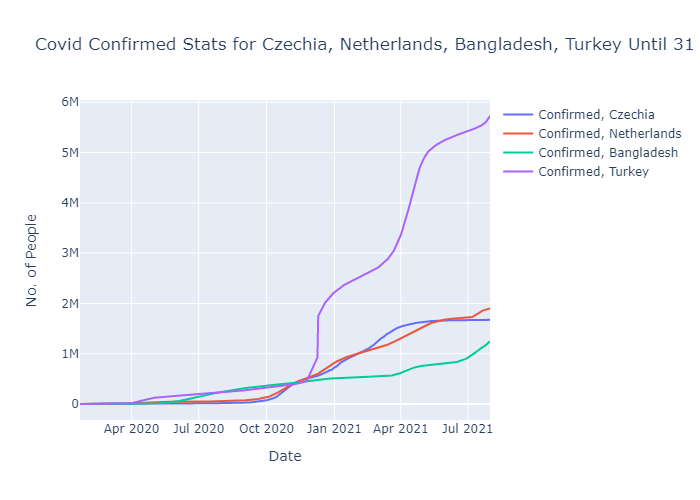

In [5]:
df_types = 'Confirmed'
countries = ['Czechia', 'Netherlands', 'Bangladesh', 'Turkey']

fig = countries_plot(df, df_types, countries)
fig.show('png')

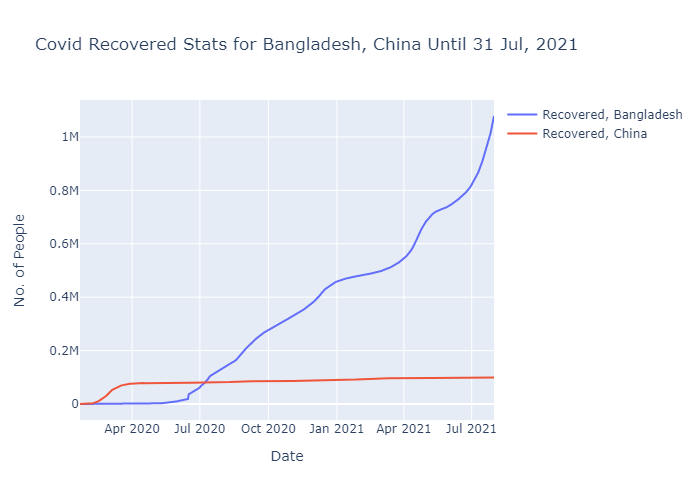

In [6]:
df_types = 'Recovered'
countries = ['Bangladesh', 'China']

fig = countries_plot(df, df_types, countries)
fig.show('png')

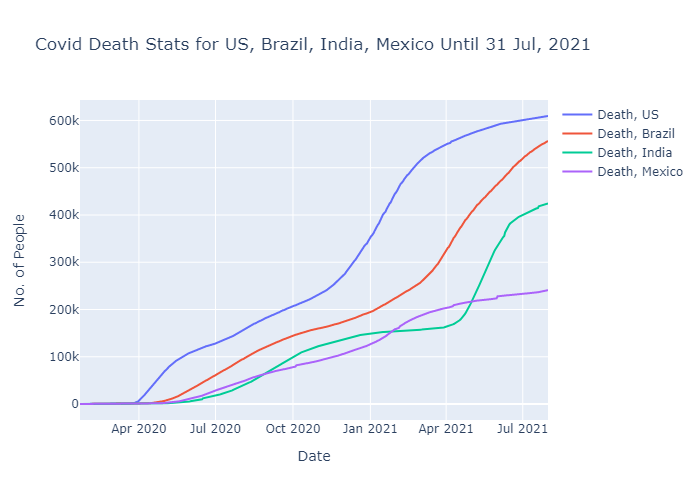

In [7]:
df_types = 'Death'
countries = ['US', 'Brazil', 'India', 'Mexico']

fig = countries_plot(df, df_types, countries)
fig.show('png')

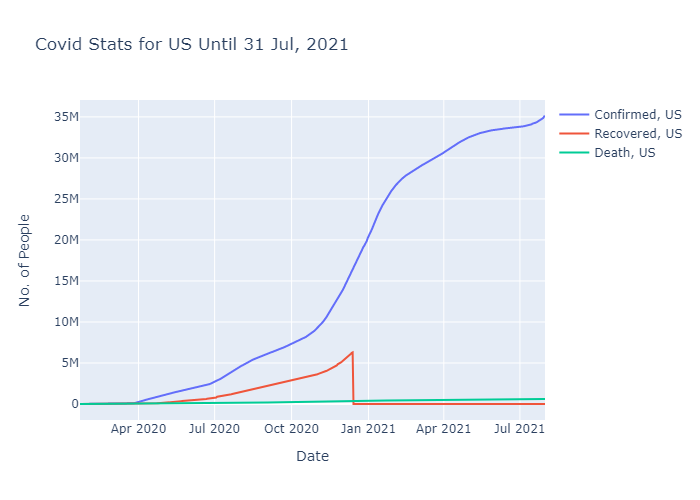

In [8]:
df_types = 'All'
countries = ['US']

fig = countries_plot(df, df_types, countries)
fig.show('png')

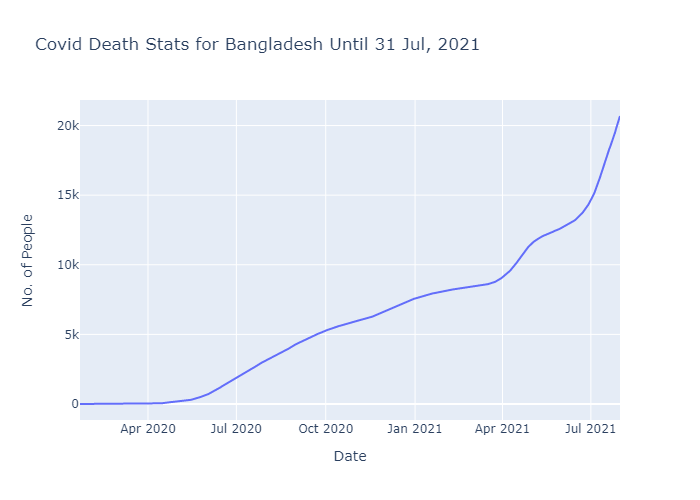

In [9]:
df_types = 'Death'
countries = ['Bangladesh']

fig = countries_plot(df, df_types, countries)
fig.show('png')